# Исследование надежности заемщиков.

### Цель проекта: На основе статистики о платёжеспособности клиентов исследовать влияет ли семейное положение и количество детей клиента на факт возврата кредита в срок

### Шаг 1. Обзор данных

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('/datasets/data.csv')

In [3]:
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


В исходнй таблице содержится 12 столбцов и 21525 строк

### Шаг 2.1 Заполнение пропусков

In [5]:
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [7]:
df.isna().mean()*100

children             0.000000
days_employed       10.099884
dob_years            0.000000
education            0.000000
education_id         0.000000
family_status        0.000000
family_status_id     0.000000
gender               0.000000
income_type          0.000000
debt                 0.000000
total_income        10.099884
purpose              0.000000
dtype: float64

Столбцы days_employed и total_income содержат 2174 пропущенных значений, это составляет ~10% относительно общего набора. Пропуски в данных о трудовом стаже и ежемесячном доходе могут быть связаны с тем, что заемщик не имеет официального трудоустройства и, соответственно, дохода. Другой вариант: заемщик не захотел преоставлять информацию о трудоустройстве и доходе. Заменим пропуски медианным значением по столбцу. В случае количественных переменных это наиболее правильное решенее, т.к. медиана в отличии от среднего более устойчива к наличию сильных выбросов и аномальных значений в данных.

In [8]:
columns_to_replace = ['days_employed', 'total_income']

for col in columns_to_replace:
    df[col] = df[col].fillna(df[col].median())

In [9]:
# проверка на наличие пропусков после выполненной замены
df.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Шаг 2.2 Проверка данных на аномалии и исправления.

In [10]:
# выведем описательную статистику для количественных переменных
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,21525.000000,21525.000000,21525.000000,21525.000000,21525.000000,2.152500e+04
mean,0.538908,56557.335698,43.293380,0.817236,0.972544,0.080883,1.651595e+05
std,1.381587,134922.319298,12.574584,0.548138,1.420324,0.272661,9.786607e+04
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2518.168900,33.000000,1.000000,0.000000,0.000000,1.077982e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-385.106616,53.000000,1.000000,1.000000,0.000000,1.955436e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


Столбец days_employed содержит как положительные, так и отрицательные значения. Более 75% значений столбца days_employed отрицательные.
Столбец children также содержит артефакты: значения "-1"

<AxesSubplot:>

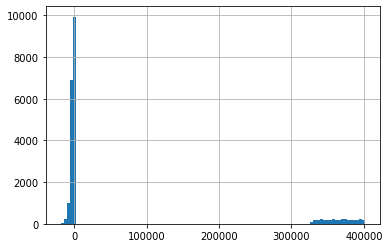

In [11]:
# гистограмма для столбца days_employed
df['days_employed'].hist(bins=100)

Видим, что большая часть значений days_employed является отрицательными. Можно предположить, что значения с отрицательным знаком были добавлены в таблицу по ошибке. Изменим знак у отрицательных значений. 

In [12]:
df.loc[df['days_employed'] < 0, 'days_employed'] *= (-1)

<AxesSubplot:>

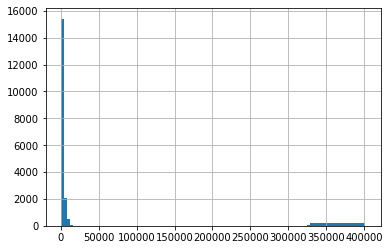

In [13]:
# гистограмма для столбца days_employed после замены знака у отрицательных значений 
df['days_employed'].hist(bins=100)

Также можно обратить внимание, что значения days_employed распределены довольно странно и гистограмма "распадается" на две части: 
1. высокие значения от 320000 до 400000, распределенные равномерно
2. низкие значения от 0 до 20000, имеющие ассиметричное распределение. 

Настораживает то, что значения в диапазоне от ~20000 до 32000 в таблице не представлены 

В столбце children также поменяем знак у значений "-1"

In [14]:
df.loc[df['children'] < 0, 'children'] *= (-1)

In [15]:
df['children'].value_counts()

0     14149
1      4865
2      2055
3       330
20       76
4        41
5         9
Name: children, dtype: int64

Видим, что в столбце children содержатся аномальные    значения "20" в количестве 76 записей. Возможно в данном случае такое обозначение было выбрано для обозначения количества детей больше 5.

In [16]:
# выведем описательную статистику для количественных переменных после исправления аномалий
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,21525.000000,21525.000000,21525.000000,21525.000000,21525.000000,2.152500e+04
mean,0.543275,60277.957929,43.293380,0.817236,0.972544,0.080883,1.651595e+05
std,1.379876,133301.583103,12.574584,0.548138,1.420324,0.272661,9.786607e+04
min,0.000000,24.141633,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,1025.608174,33.000000,1.000000,0.000000,0.000000,1.077982e+05
50%,0.000000,1808.053434,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,4779.587738,53.000000,1.000000,1.000000,0.000000,1.955436e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


### Шаг 2.3. Изменение типов данных.

In [17]:
# провверка типа данных в столбце total_income
df.total_income.dtypes

dtype('float64')

In [18]:
# изменим тип данных в столбце total_income на целочисленный (int)
df.total_income = df.total_income.astype(int)

In [19]:
# провверка типа данных после изменения
df.total_income.dtypes

dtype('int64')

### Шаг 2.4. Удаление дубликатов.

Для начала оценим количество явных дубликатов а данных

In [20]:
df.duplicated().sum()

54

In [21]:
duplicated_df = df[df.duplicated()].head(10) 
duplicated_df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
2849,0,1203.369529,41,среднее,1,женат / замужем,0,F,сотрудник,0,145017,покупка жилья для семьи
4182,1,1203.369529,34,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,145017,свадьба
4851,0,1203.369529,60,среднее,1,гражданский брак,1,F,пенсионер,0,145017,свадьба
5557,0,1203.369529,58,среднее,1,гражданский брак,1,F,пенсионер,0,145017,сыграть свадьбу
7808,0,1203.369529,57,среднее,1,гражданский брак,1,F,пенсионер,0,145017,на проведение свадьбы
8583,0,1203.369529,58,высшее,0,Не женат / не замужем,4,F,пенсионер,0,145017,дополнительное образование
9238,2,1203.369529,34,среднее,1,женат / замужем,0,F,сотрудник,0,145017,покупка жилья для сдачи
9528,0,1203.369529,66,среднее,1,вдовец / вдова,2,F,пенсионер,0,145017,операции со своей недвижимостью
9627,0,1203.369529,56,среднее,1,женат / замужем,0,F,пенсионер,0,145017,операции со своей недвижимостью
10462,0,1203.369529,62,среднее,1,женат / замужем,0,F,пенсионер,0,145017,покупка коммерческой недвижимости


В таблице имеется 54 явных строк-дубликатов. Удалим их с импользованием метода drop_duplicates(). Также обновим индексацию датафрейма после удаления янвых дубликатов с помощью reset_index

In [22]:
df = df.drop_duplicates().reset_index(drop=True)

Теперь оценим наличие неявных дубликатов в категориальных столбцах

In [23]:
# проверка уникальных значений education
df.education.unique()

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

Видим, что в столбце education содержится множество неявных дубликатов, связанных с разным регистром. Выявленные дубликаты можно объяснить тем, что информация об уровене образования вручную вносилась каждым из заемщиков при подаче заявки на кредит и какой-либо постобработки данных не производилось. Для приведения всех значений education к единому регистру воспользуемся метододами .str и .lower().

In [24]:
df.education = df.education.str.lower()

In [25]:
# проверка уникальных значений после изменеия регистра
df.education.unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

In [26]:
# проверим таблицу на явные дубликаты после смены регистра
df.duplicated().sum()

17

После удаления дубликатов education, связанных с регистром, в таблице появлись 17 явных дубликатов. Удалим их.

In [27]:
df = df.drop_duplicates().reset_index(drop=True)

Аналогично проверим другие столбцы 

In [28]:
# проверка уникальных значений income_type
df.income_type.unique()

array(['сотрудник', 'пенсионер', 'компаньон', 'госслужащий',
       'безработный', 'предприниматель', 'студент', 'в декрете'],
      dtype=object)

In [29]:
# проверка уникальных значений family_status
df.family_status.unique()

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

In [30]:
# проверка уникальных значений purpose
df.purpose.unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

В столбце purpose можно заметить много повторяющихся по смыслу фраз, которые также можно расценивать как неявные дубликаты, например, 'покупка жилья', 'покупка недвижимости' и т.д. На данном шаге оставим значния столбца без изменений, т.к. далее на шаге 2.7 будет произведена категоризация значений рассматриваемого столбца. 

### Шаг 2.5. Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

Создадим два датафрейма - "словаря":
1. в первом каждому уникальному значению из education поставим в соответствие уникальное значение education_id 
2. во втором каждому уникальному значению из family_status поставим в соответствие уникальное значение family_status_id

In [31]:
# объект-словарь с education и education_id
df_education = df[['education', 'education_id']]
df_education = df_education.drop_duplicates().reset_index(drop=True)

In [32]:
# объект-словарь с education и education_id
df_fam_status = df[['family_status', 'family_status_id']]
df_fam_status = df_fam_status.drop_duplicates().reset_index(drop=True)

In [33]:
# проверим полученные датафреймы, чтобы убедиться, что получили нужное
display(df_education, df_fam_status)


,education,education_id
0,высшее,0
1,среднее,1
2,неоконченное высшее,2
3,начальное,3
4,ученая степень,4


,family_status,family_status_id
0,женат / замужем,0
1,гражданский брак,1
2,вдовец / вдова,2
3,в разводе,3
4,Не женат / не замужем,4


Удалим из исходной таблицы столбцы education и family_status

In [34]:
df.drop(['education', 'family_status'], axis = 1, inplace = True)

In [35]:
# Проверим исходную таблиицу
df.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,покупка жилья
1,1,4024.803754,36,1,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623.422610,33,1,0,M,сотрудник,0,145885,покупка жилья
3,3,4124.747207,32,1,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266.072047,53,1,1,F,пенсионер,0,158616,сыграть свадьбу


### Шаг 2.6. Категоризация дохода.

На основе данных о доходе проведем категоризацию данных. Для этого создадим дополнительный столбец total_income_category

In [36]:
# Здесь также можно воспользоваться конструкцией if, elif

df.loc[(df['total_income'] >= 0) & (df['total_income'] <= 30000) , 'total_income_category'] = 'E'
df.loc[(df['total_income'] >= 30001) & (df['total_income'] <= 50000) , 'total_income_category'] = 'D'
df.loc[(df['total_income'] >= 50001) & (df['total_income'] <= 200000) , 'total_income_category'] = 'C'
df.loc[(df['total_income'] >= 200001) & (df['total_income'] <= 1000000) , 'total_income_category'] = 'B'
df.loc[df['total_income'] >= 1000001 , 'total_income_category'] = 'A'

### Шаг 2.7. Категоризация целей кредита.

На этом шаге создадим функцию, которая на основании данных из столбца purpose сформирует новый столбец purpose_category, в который войдут следующие категории:
- 'операции с автомобилем',
- 'операции с недвижимостью',
- 'проведение свадьбы',
- 'получение образования'

Но прежде изучим уникальные значения в столбце purpose

In [37]:
df.purpose.unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

In [38]:
def purp_categs(row):
    if 'авто' in row:
        return 'операции с автомобилем' 
    elif 'свад' in row:
        return 'проведение свадьбы'
    elif 'образов' in row:
        return 'получение образования'
    else:
        return 'операции с недвижимостью'

In [39]:
df['purpose_category'] = df['purpose'].apply(purp_categs)

In [40]:
# посмотрим первые записи финальной таблицы после выполненной предобработки
df.head(10)

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,1,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,1,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы
5,0,926.185831,27,0,1,M,компаньон,0,255763,покупка жилья,B,операции с недвижимостью
6,0,2879.202052,43,0,0,F,компаньон,0,240525,операции с жильем,B,операции с недвижимостью
7,0,152.779569,50,1,0,M,сотрудник,0,135823,образование,C,получение образования
8,2,6929.865299,35,0,1,F,сотрудник,0,95856,на проведение свадьбы,C,проведение свадьбы
9,0,2188.756445,41,1,0,M,сотрудник,0,144425,покупка жилья для семьи,C,операции с недвижимостью


### Ответы на вопросы.

##### Вопрос 1: Есть ли зависимость между количеством детей и возвратом кредита в срок?


In [41]:
# посмотрим количество клиентов для разных значение столбца children
df.children.value_counts()

0     14091
1      4855
2      2052
3       330
20       76
4        41
5         9
Name: children, dtype: int64

Видим, что в таблице содержится всего 9 записей о клиентах, имеющим 5 детей. Можно допустить, что такая выборка не является достаточно представительной. При формировании дальнейших выводов предлагаю не учитывать данную группу клиентов.

Построим сводную таблицу в которой для каждого значения количества детей найдем долю тех клиентов, кто имел задолженность по возврату кредитов. Воспользуемся аггрегирующей функции mean. Отсортируем таблицу по убыванию значений задолженности


In [42]:
df.pivot_table(index = 'children', 
               values = 'debt', 
               aggfunc = 'mean').sort_values(by = 'debt', ascending = False)


,debt
children,
20,0.105263
4,0.097561
2,0.094542
1,0.091658
3,0.081818
0,0.075438
5,0.000000


##### Вывод 1:

Видим, что наибольшее значение доли клиентов с задолженностью (10.5%) соответствует группе с наибольшим количеством детей. Клиенты с другим количеством детей отражены в сводной таблице неупорядоченно, таким образом прямой зависимости между долей клиентов с задолженностью и кол-вом детей не наблюдается.

##### Вопрос 2: Есть ли зависимость между семейным положением и возвратом кредита в срок?


Построим сводную таблицу в которой для каждого идентификатора семейного положения найдем долю тех клиентов, кто имел задолженность по возврату кредитов с помощью аггрегирующей функции mean. Отсортируем таблицу по убыванию значений задолженности. И добавим расшифровку для family_status_id из созданного ранее датафрейма-словаря

In [43]:
df.pivot_table(index = 'family_status_id', 
               values = 'debt', 
               aggfunc = 'mean').sort_values(by = 'debt', 
                                             ascending = False).merge(df_fam_status, 
                                                                      on = 'family_status_id', 
                                                                      how = 'left')

,family_status_id,debt,family_status
0,4,0.097509,Не женат / не замужем
1,1,0.093471,гражданский брак
2,0,0.075452,женат / замужем
3,3,0.071130,в разводе
4,2,0.065693,вдовец / вдова


##### Вывод 2:

Среди клиентов, с семейным статусом "Не женат / не замужем" доля тех, кто имел задолженности по креду, составляет 9.75% - это наибольшее значение из всех групп. Наименьшая доля клиентов с задолженностью (6.56%) соответсвует семейному статусу "вдовец / вдова".
    

##### Вопрос 3: Есть ли зависимость между уровнем дохода и возвратом кредита в срок?


Построим сводную таблицу в которой для каждой категории дохода найдем долю тех клиентов, кто имел задолженность по возврату кредитов с помощью аггрегирующей функции mean. Отсортируем таблицу по убыванию значений задолженности. 

In [44]:
df.pivot_table(index = 'total_income_category', 
               values = 'debt', 
               aggfunc = 'mean').sort_values(by = 'debt', ascending = False)

,debt
total_income_category,
E,0.090909
C,0.084915
A,0.080000
B,0.070621
D,0.060000


##### Вывод 3:

Прямой зависимости между уровнем дохода и возвратом кредита в срок не наблюдается - категории дохода не совсем упорядочены относительно доли клинтов с задолженностью. Однако можно заметить, что среди клиетов, попадающих в группу "Е" (те, кто имеет наименьший доход) наибольшее количество тех, кто ранее имел задолженность по возврату кредитов.

##### Вопрос 4: Как разные цели кредита влияют на его возврат в срок?


Построим сводную таблицу в которой для каждой категории цели займа найдем долю тех клиентов, кто имел задолженность по возврату кредитов с помощью аггрегирующей функции mean. Отсортируем таблицу по убыванию значений задолженности.

In [45]:
df.pivot_table(index = 'purpose_category', 
               values = 'debt', 
               aggfunc = 'mean').sort_values(by = 'debt', ascending = False)

,debt
purpose_category,
операции с автомобилем,0.093590
получение образования,0.092200
проведение свадьбы,0.080034
операции с недвижимостью,0.072334


##### Вывод 4:

Среди клиентов, с целью кредита "операции с автомобилем" доля тех, кто имел задолженности по креду, составляет 9.35% - это наибольшее значение из всех категорий цели кредита. Наименьшая доля клиентов с задолженностью (7.23%) соответсвует цели "операции с недвижимостью".

## Общий вывод:

Был предобработан и проанализирован набор данных со статистикой о платёжеспособности клиентов банка. Проведенный анализ показал, что наиболее рискованные группы клиентов с точки зрения платежеспособности (имеющие задолженность по возврату кредита):
- клиенты с количеством детей более 5
- не женатые клиенты
- клиенты с уровнем дохода 0 - 30000
- клиенты, которые берут кредит на операции с автомобилем 

Наименее рискованные группы клиентов с точки зрения платежеспособности: 
- клиенты, не имеющие детей
- клиенты с семейным статусом "вдовец / вдова"
- клиенты с уровнем дохода 30001–50000
- клиенты, которые берут кредит на различные операции с недвижимостью 